<a href="https://colab.research.google.com/github/sachinkun21/customer_segmentation/blob/master/Customer_Segmentation_Monthly_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction: 
A cohort is a group of users sharing a particular characteristic. Strictly speaking it can be any characteristic, but typically the term cohort refers to a time-dependent grouping. For example, a typical cohort groups users by the week or month when they were first acquired. When speaking of groupings that are not time-dependent, the term segment is typically used instead of cohort.

#### Cohort Analysis:
A cohort analysis refers to tracking and investigating the performance of cohorts over time.

For example, if you wanted to see if users you’re acquiring now are more or less valuable than users you’ve acquired in the past, you can define cohorts by the month when they were first acquired. You can then run a cohort analysis to compare year-over-year revenue performance.

### Problem Statement
In this Data Tale, we will perform Time Cohort Analysis.
Time base Cohorts group the customer by the time they completed their first activity.

In this analysis, We will:
- segment customers into cohorts based on the month they made thier first purchase in.
-  We will then assign a cohort index to each purchase of a customer. i.e we will mark each transaction based on it's relative time period since it's first purchase.
- Cohort Index assigned  will represent months since the 1st transaction of that particular customer.

- In the Last step, we will calculate various business metrics such as retention  or average Revenue Generated and build a Heatmap using it to represent the results.

- The final outcome will look like this:

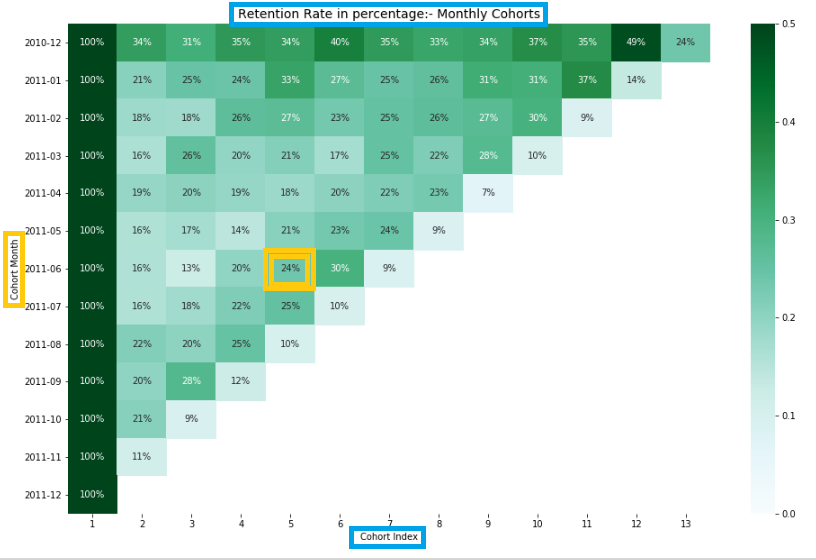

The column highlighted in figure with value as 24% represents, 24% of cohorts which signed in June 2011 were active 5 months later.

Can you see the 100% value in all cells in column 1. It's because this was the month when customer signed up or did their first purchase. So it's obvious that it will have rate of 100% activity.

Let's import pandas and numpy libaries to perform necessary calculations.

In [0]:
import pandas as pd
import numpy as np

#### About the dataset.
We will use the dataset provided by UCI machine Learning Laboratory.
It has around 0.5 million records of a UK based online firm and contains realistic customer Transaction information in a commonly used format in Industry.

let's load the data and take a look at first 5 rows of it:

In [3]:
df = pd.read_csv('online.csv', parse_dates=['InvoiceDate'], index_col='Unnamed: 0')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


The dataset contains 7 columns for each customer transaction representing variuos features of a transaction.

For time cohort analysis, we will use:
- DateTime column
- Price Column
- CustomerID column.

The dataset has already been loaded. Let's create a `Cohort Table` for time based cohort Analysis.





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
InvoiceNo      70864 non-null int64
StockCode      70864 non-null object
Description    70864 non-null object
Quantity       70864 non-null int64
InvoiceDate    70864 non-null datetime64[ns]
UnitPrice      70864 non-null float64
CustomerID     70864 non-null int64
Country        70864 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.9+ MB


### Step 1: Let's extract the Month of the Purchase of each transaction.

#### First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [0]:
# importing DateTime module to convert extracted dates
import datetime as dt

# Defining the function that will parse the date and return 1st day of respective month
def extract_month(date_value):
  return dt.datetime(date_value.year, date_value.month, 1)

#### Now we will use the function created above to convert all the invoice dates into respective month date format.

In [6]:
# Creating InvoiceMonth column using the function created in previous step
df['InvoiceMonth'] = df['InvoiceDate'].apply(extract_month) 
df[['InvoiceDate','InvoiceMonth']].head()

,InvoiceDate,InvoiceMonth
416792,2011-10-25 08:26:00,2011-10-01
482904,2011-11-20 11:56:00,2011-11-01
263743,2011-07-14 13:35:00,2011-07-01
495549,2011-11-23 15:53:00,2011-11-01
204384,2011-05-25 13:36:00,2011-05-01


### Step 2: Now we will use the Invoice Month created in step1 to generate cohort Date values

####  Creating a groupby object with respect to CustomerID variable, and selecting InvoiceDay for further calculations.

In [0]:
group = df.groupby('CustomerID')['InvoiceMonth']

You can uncomment and execute the following code block to see the groups.

In [0]:
# for key, item in group:
#     print(group.get_group(key), "\n\n")

#### Now let's assign the acquistion Cohort value to each transaction based on the minimum value of InvoiceMonth of the group it belongs to.

In [9]:
df['CohortMonth'] = group.transform('min')
df[['CustomerID','InvoiceDate','InvoiceMonth', 'CohortMonth']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth
416792,14286,2011-10-25 08:26:00,2011-10-01,2011-04-01
482904,16360,2011-11-20 11:56:00,2011-11-01,2011-09-01
263743,13933,2011-07-14 13:35:00,2011-07-01,2011-07-01
495549,17290,2011-11-23 15:53:00,2011-11-01,2011-11-01
204384,17663,2011-05-25 13:36:00,2011-05-01,2011-02-01


To read how transform works on group by object click on the link here https://pbpython.com/pandas_transform.html

### Step 3: Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.

First, we will create 4 variables that capture the integer value of years, months  for Invoice and Cohort Date using the get_date_int() function given below:



In [0]:
def parse_dates_int(date_column):
    year = date_column.dt.year
    month = date_column.dt.month
    
    return year, month


#### Now, We will use this function to extract the integer values for Invoice as well as Cohort Date in 3 seperate series for each of the two columns


In [11]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month = parse_dates_int(df['InvoiceDate'])

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month = parse_dates_int(df['CohortMonth'])

# Printing top 5 of each series
cohort_year.head(), cohort_month.head()

(416792    2011
 482904    2011
 263743    2011
 495549    2011
 204384    2011
 Name: CohortMonth, dtype: int64, 416792     4
 482904     9
 263743     7
 495549    11
 204384     2
 Name: CohortMonth, dtype: int64)

Now, we have 4  pandas series containing year, month and day values for Invoice and Cohort dates columns as: - **invoice_year, cohort_year, invoice_month and cohort_month** respectively.

#### We will use these integer values extracted above to calculate business metrics for our time cohorts:
- We will calculate the difference between the Invoice Dates and Cohort dates in years, months separately.
- then calculate the total Months difference between the two. 
- This will be our Months offset or cohort Index, which we will use in the next section to calculate retention rate.

In [0]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
# days_diff = invoice_day - cohort_day

# Using the variables created above to calcualte the difference in days and storing them in cohort Index column
df['CohortIndex'] = years_diff * 12 + months_diff+ 1

In [13]:
df[['CustomerID','InvoiceDate','InvoiceMonth', 'CohortMonth', 'CohortIndex']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth,CohortIndex
416792,14286,2011-10-25 08:26:00,2011-10-01,2011-04-01,7
482904,16360,2011-11-20 11:56:00,2011-11-01,2011-09-01,3
263743,13933,2011-07-14 13:35:00,2011-07-01,2011-07-01,1
495549,17290,2011-11-23 15:53:00,2011-11-01,2011-11-01,1
204384,17663,2011-05-25 13:36:00,2011-05-01,2011-02-01,4


We have  assigned the Monthly time offset i.e Cohort Index to each transaction and ready to use it for running daily cohort analysis!

### Step 4: Calculating Retention Count: 
The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In the this section, we will calculate retention count for each cohort Month paired with cohort Index

#### First, We will group by our dataset with respect to CohortMonth and CohortIndex first

In [14]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# printing len of group by object
len(grouping)

91

#### Now we will count number of unique customer Id's falling in each group of CohortMonth and CohortIndex.
This will give us number of customers(Retained Customers) from  each cohort who bought items after a n Months where n is CohortIndex.

and store them in a new dataframe cohort Data.

In [0]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data.columns = ['CohortMonth',	'CohortIndex',	'Count of unique CustomerID']


In [16]:
cohort_data.head()

,CohortMonth,CohortIndex,Count of unique CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245


### Step 5: Retention Rate calculation:
Now that we have count of retained customer for each cohortMonth and cohortIndex
let's convert it into suitable format for readability and Calulation of retention Rate for each Cohort

In [17]:
# Creating new dataframe with index as CohortMonth, columns as Cohort indexes and Values as Count
retention_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Count of unique CustomerID')

# Printing top 5 rows of Pivoted dataframe
retention_counts.head()


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN


#### Now we will use the the Cohort Count dataframe to calculate the retention rate
- We will store the 1st column as Cohort size i.e total Number of Customers in that Cohort
- We will divide the values in other columns with Cohort Size in order to calculate the retention rate i.e Number of Customers in Each Cohort Index

In [0]:
# Select the first column and store it to cohort_sizes
cohort_sizes = retention_counts.iloc[:,0]



Now we will divide the values in all the columns with values in Column 1 Row-Wise

In [34]:
# Divide the cohort count by cohort sizes along the rows
retention_rate = retention_counts.divide(cohort_sizes, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention_rate

# printing top 5 rows of retention Rate
retention_rate.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,34.4,30.9,35.1,34.2,39.8,34.8,33.0,33.5,37.0,35.5,48.6,24.0
2011-01-01,100.0,20.8,24.7,24.4,33.1,27.1,24.7,25.9,31.3,30.7,37.3,13.6,NaN
2011-02-01,100.0,18.4,18.0,26.3,26.9,23.4,25.3,26.3,27.2,30.1,8.9,NaN,NaN
2011-03-01,100.0,16.2,25.8,19.6,21.4,17.3,25.3,21.9,27.6,9.8,NaN,NaN,NaN
2011-04-01,100.0,19.2,20.4,19.2,18.4,20.4,22.0,23.1,6.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.1,17.3,14.5,20.9,23.3,24.5,8.8,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.9,12.6,19.8,23.7,30.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,16.2,17.9,22.0,25.4,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,21.6,20.1,25.2,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention Rate dataframe represent Customer retained across Cohurts. We can read it as following:
- Index value represents the Cohort
- Columns represent the number of months since current Cohort
- for example the value at index `2010-12-01` column `7` is 34.8 and Represents `34.8%` of customers from cohort `2010-12` were retained in `7th` Month.


#### Also you can see from the retention Rate DataFrame:
-  Retention Rate 1st index i.e 1st month is 100%  as all the customers for that particular customers signed up in 1st Month
- Retention Rate may increase or decrease in Subsequent Indexes.
- Values towards BottomRight have a lot of NaN values

***Can You think of the reason for the number of NaN values towards RIGHT BOTTOM ?***

Yes, As you might have Guessed, The Cohort Indexes towards Right represent Number of Months away the Values are from Current Cohort.
Thus the values at Bottom Right cells don't have data of acquisition as they are too recent

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object')

### Step 6: Visualizing the Above Retention rate
- Visualzation allows decision makers to read and interpret patterns in data easily. 
- This allows the organisation to act identify and Act on Trends Faster
- In this section, we will visualize cohort analysis using HeatMap as it is very easy to read and Contains color Mapping representing the Values

Before we starting plotting our HeatMap, let's set the index of our Retention rate dataframe to a more readable string format

In [0]:
retention_rate.index = retention_rate.index.strftime('%Y-%m')
retention_rate.index

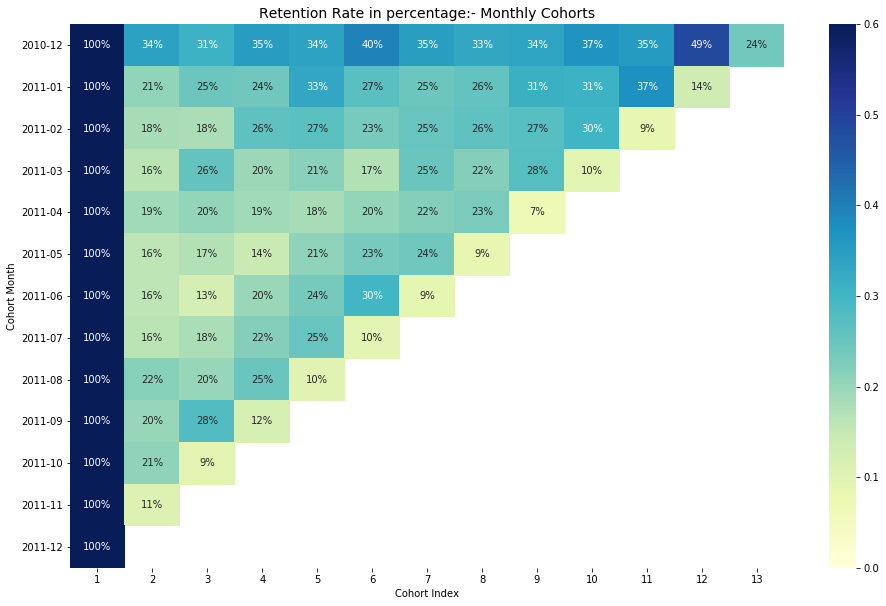

In [52]:
#loading seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(retention_rate, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()


This marks the end of Cohort Analysis for Retention Rate of Customers.

The Heatmap generated can be used to present the cohort Analysis result to Decision Makers and Executives in order to generate insights and Take actions

AS we discussed at the start of this Analysis, Cohort Analytics can be used not only for performing Customer Retention rate but also many other business metrics.

### One More Metric
We will calculate One more Metric: *Total_Revenue Generated* in next section before closing this Analysis and I will give a couple of Tasks to perform, practice and Enhance your understanding of Cohort Analysis. 

#### Calculating Total revenue generated
You will now calculate the average revenue generated and in order to analyze trends and insights across all Monthly cohorts.

let's start:

In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Revenue
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7,12.60
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3,1.45
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1,22.50
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1,2.10
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4,17.85


We will first calculate revenue for each order by multiplying the Quantity with UnitPrice

In [0]:
df['Revenue'] = df['UnitPrice']*df['Quantity']

Create a groupby object and pass the monthly cohort and cohort index as a list.
Select the unit price column, calculate the average, and store it to cohort_data.
Reset the index of cohort_data DataFrame.
Create a pivot with monthly cohort in the index, cohort index in the columns and the unit price in the values, and print the result.

In [50]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = df.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['Revenue'].sum()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Revenue')
print(average_price.round(1))

CohortIndex        1        2        3   ...       11       12       13
CohortMonth                              ...                           
2010-12-01   101891.4  33038.8  32279.5  ...  66110.6  68813.1  29714.7
2011-01-01    41149.5   6855.5   9992.6  ...  23621.6   5921.5      NaN
2011-02-01    31156.4   6343.5   5507.6  ...   2423.6      NaN      NaN
2011-03-01    35845.3   5427.5  12493.4  ...      NaN      NaN      NaN
2011-04-01    23911.9   4437.5   5842.9  ...      NaN      NaN      NaN
2011-05-01    23279.5   4106.1   3436.7  ...      NaN      NaN      NaN
2011-06-01    14387.9   3154.0   2994.6  ...      NaN      NaN      NaN
2011-07-01    15007.4   2501.0   2440.6  ...      NaN      NaN      NaN
2011-08-01    15000.5   4734.2   6389.9  ...      NaN      NaN      NaN
2011-09-01    28812.8   5181.7   7510.5  ...      NaN      NaN      NaN
2011-10-01    31328.8   8749.1   1793.0  ...      NaN      NaN      NaN
2011-11-01    25533.9   2216.5      NaN  ...      NaN      NaN  

You can see the values of Total revenue generated by customers acquired in each Cohort across cohort Indexes as above.

 cohort analysis and can start creating custom metrics on your own!

#### Practice Problems:
1. h
2. b